In [40]:
from keras.models import Sequential
from keras.layers import Conv2D, MaxPooling2D, Flatten, Dense, Dropout
from keras.preprocessing.image import ImageDataGenerator

# Initialize CNN
model = Sequential()

# Add Convolution Layer
model.add(Conv2D(32, (3, 3), input_shape=(64, 64, 3), activation='relu'))

# Add Pooling Layer
model.add(MaxPooling2D(pool_size=(2, 2)))

# Add another Convolution Layer
model.add(Conv2D(32, (3, 3), activation='relu'))

# Add another Pooling Layer
model.add(MaxPooling2D(pool_size=(2, 2)))

# Add Flattening Layer
model.add(Flatten())

# Add Full Connection Layer
model.add(Dense(units=128, activation='relu'))
model.add(Dropout(0.5))  # Dropout layer
model.add(Dense(units=4, activation='softmax'))  # 4 units for 4 classes

# Compile the CNN
model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])

# Part 2 - Fitting the CNN to the images
train_datagen = ImageDataGenerator(rescale=1./255,
                                   shear_range=0.2,
                                   zoom_range=0.2,
                                   horizontal_flip=True)

test_datagen = ImageDataGenerator(rescale=1./255)

training_set = train_datagen.flow_from_directory('C:/Users\maryc/Desktop/pythonproject/work/training',
                                                 target_size=(64, 64),
                                                 batch_size=32,
                                                 class_mode='categorical')

test_set = test_datagen.flow_from_directory('C:/Users/maryc/Desktop/pythonproject/work/test',
                                            target_size=(64, 64),
                                            batch_size=32,
                                            class_mode='categorical')

# Calculate steps_per_epoch and validation_steps
steps_per_epoch = len(training_set)  # total number of batches in the training set
validation_steps = len(test_set)  # total number of batches in the validation set

history = model.fit(training_set,
                    steps_per_epoch=steps_per_epoch,
                    epochs=25,
                    validation_data=test_set,
                    validation_steps=validation_steps)


Found 296 images belonging to 4 classes.
Found 297 images belonging to 4 classes.
Epoch 1/25
10/10 [==============================] - 8s 802ms/step - loss: 1.4083 - accuracy: 0.3311 - val_loss: 1.3064 - val_accuracy: 0.3838
Epoch 2/25
10/10 [==============================] - 7s 712ms/step - loss: 1.2209 - accuracy: 0.4527 - val_loss: 1.2038 - val_accuracy: 0.4377
Epoch 3/25
10/10 [==============================] - 7s 708ms/step - loss: 1.1531 - accuracy: 0.4628 - val_loss: 1.2327 - val_accuracy: 0.3872
Epoch 4/25
10/10 [==============================] - 7s 742ms/step - loss: 1.1475 - accuracy: 0.4730 - val_loss: 1.1201 - val_accuracy: 0.5556
Epoch 5/25
10/10 [==============================] - 8s 799ms/step - loss: 1.0832 - accuracy: 0.5439 - val_loss: 1.1117 - val_accuracy: 0.4747
Epoch 6/25
10/10 [==============================] - 8s 849ms/step - loss: 0.9921 - accuracy: 0.6047 - val_loss: 1.0188 - val_accuracy: 0.5354
Epoch 7/25
10/10 [==============================] - 8s 766ms/step 

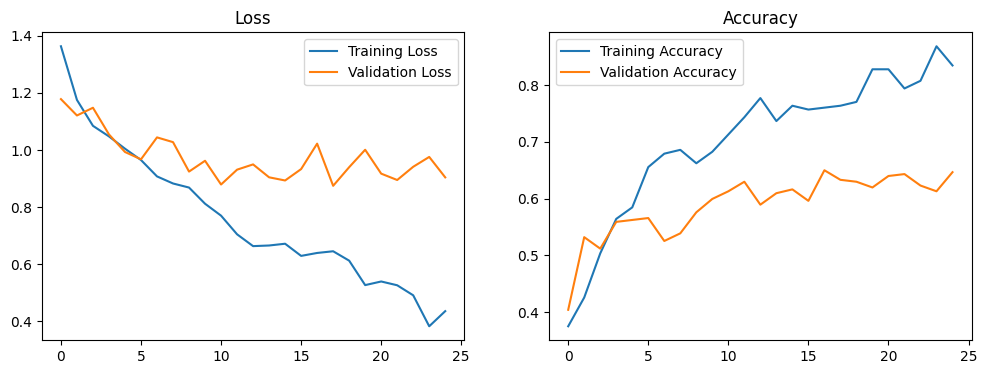

In [36]:
import matplotlib.pyplot as plt# Plot the training and validation loss and accuracy
plt.figure(figsize=(12, 4))

plt.subplot(1, 2, 1)
plt.plot(history.history['loss'], label='Training Loss')
plt.plot(history.history['val_loss'], label='Validation Loss')
plt.legend()
plt.title('Loss')

plt.subplot(1, 2, 2)
plt.plot(history.history['accuracy'], label='Training Accuracy')
plt.plot(history.history['val_accuracy'], label='Validation Accuracy')
plt.legend()
plt.title('Accuracy')

plt.show()

In [37]:
# Evaluate the model on the test data
test_loss, test_acc = model.evaluate(test_set)
print('Test Loss: {}'.format(test_loss))
print('Test Accuracy: {}'.format(test_acc))


10/10 [==============================] - 4s 366ms/step - loss: 0.9041 - accuracy: 0.6465
Test Loss: 0.9040899276733398
Test Accuracy: 0.6464646458625793


1/1 [==============================] - 0s 32ms/step
The image is predicted to belong to class: fire and smoke


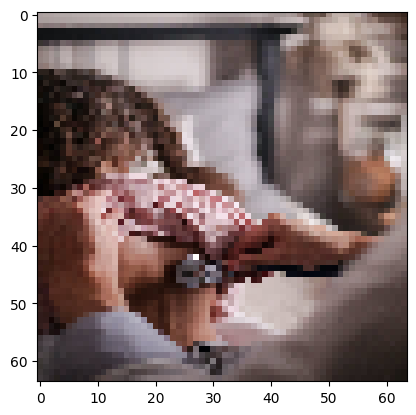

In [45]:
from tensorflow.keras.preprocessing import image
import numpy as np
import matplotlib.pyplot as plt
# Load the image
img_path = 'C:/Users/maryc/Desktop/pythonproject/work/test4.jpg'  # replace with the path to your image
img = image.load_img(img_path, target_size=(64, 64))

# Preprocess the image
img_tensor = image.img_to_array(img)
img_tensor = np.expand_dims(img_tensor, axis=0)
img_tensor /= 255.  # the model was trained on inputs that were normalized to [0, 1]

# Use the model to predict the class of the image
prediction = model.predict(img_tensor)

# Define the class names
class_names = ['Fire', 'fire and smoke', 'non-fire and non-smoke', 'smoke']

# Get the index of the class with the highest predicted probability
predicted_index = np.argmax(prediction)
plt.imshow(img_tensor[0])
# Print the predicted class name
print(f"The image is predicted to belong to class: {class_names[predicted_index]}")
